In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized

100% 7.25G/7.25G [02:47<00:00, 28.7MB/s]
100% 7.25G/7.25G [02:47<00:00, 46.6MB/s]


In [4]:
!unzip diabetic-retinopathy-resized.zip

Archive:  diabetic-retinopathy-resized.zip
  inflating: resized_train/resized_train/10003_left.jpeg  
  inflating: resized_train/resized_train/10003_right.jpeg  
  inflating: resized_train/resized_train/10007_left.jpeg  
  inflating: resized_train/resized_train/10007_right.jpeg  
  inflating: resized_train/resized_train/10009_left.jpeg  
  inflating: resized_train/resized_train/10009_right.jpeg  
  inflating: resized_train/resized_train/1000_left.jpeg  
  inflating: resized_train/resized_train/1000_right.jpeg  
  inflating: resized_train/resized_train/10010_left.jpeg  
  inflating: resized_train/resized_train/10010_right.jpeg  
  inflating: resized_train/resized_train/10013_left.jpeg  
  inflating: resized_train/resized_train/10013_right.jpeg  
  inflating: resized_train/resized_train/10014_left.jpeg  
  inflating: resized_train/resized_train/10014_right.jpeg  
  inflating: resized_train/resized_train/10015_left.jpeg  
  inflating: resized_train/resized_train/10015_right.jpeg  
  infla

In [0]:
from fastai import *
from fastai.vision import *
import pandas as pd

In [0]:
PATH = Path('./')

In [7]:
!ls './'

diabetic-retinopathy-resized.zip  sample_data
resized_train			  trainLabels_cropped.csv
resized_train_cropped		  trainLabels.csv


In [0]:
tfms = get_transforms(max_rotate=15., max_zoom=1.2, max_lighting=0, max_warp=0, do_flip=False)

In [0]:
data = (ImageList.from_csv(PATH, folder='resized_train/resized_train', 
                           csv_name='trainLabels.csv', cols=['image'],suffix='.jpeg')
                          .use_partial_data(sample_pct = .1, seed=42)
                          .split_by_rand_pct(valid_pct=0.2, seed=42)
                          .label_from_df(cols=['level'])
                          .transform(tfms, size=64)
                          .databunch(bs=64)).normalize(imagenet_stats)

In [10]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:02<00:00, 111MB/s]


In [11]:
learn.fit_one_cycle(1)

In [12]:
interpret = ClassificationInterpretation.from_learner(learn)

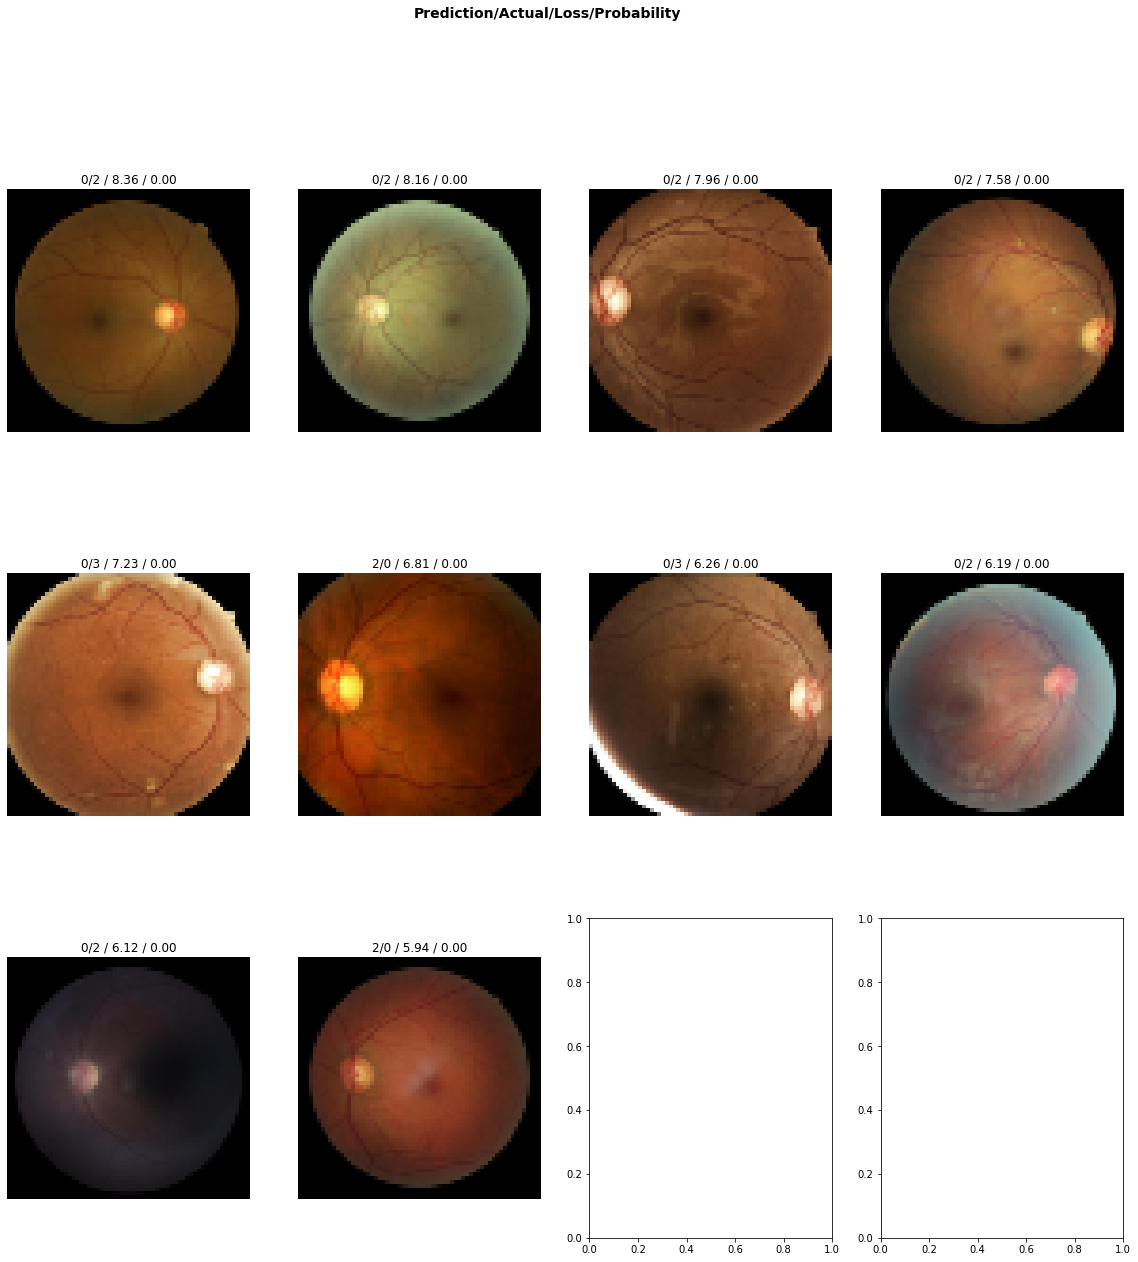

In [13]:
interpret.plot_top_losses(10, figsize=(20, 20))

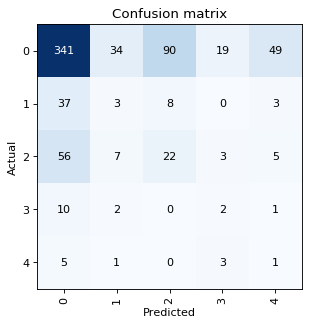

In [14]:
interpret.plot_confusion_matrix(figsize=(4, 4), dpi=80)

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-02
Min loss divided by 10: 6.92E-03


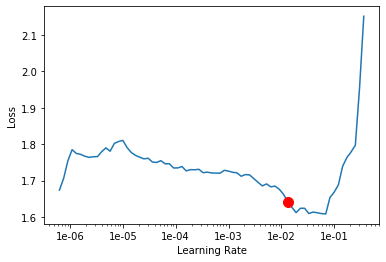

In [16]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
learn.fit_one_cycle(6, 1e-2)

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.75E-05


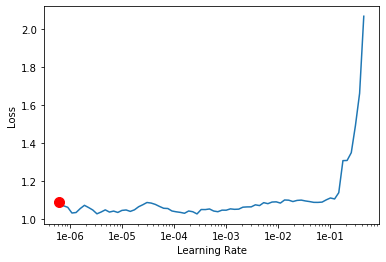

In [19]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [21]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('diabetic_retinopathy_final')